In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from patchify import patchify
from tensorflow.keras.metrics import MeanIoU
from sklearn.preprocessing import MinMaxScaler

In [9]:
DIR_PATH = "Semantic segmentation dataset/"
scaler = MinMaxScaler()
patch_size = 256

image_data = []

for path , subdirs, files in os.walk(DIR_PATH):
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'images':
        images = os.listdir(path)
        for i, image_name in enumerate(images):
            #if image_name.endswith('.jpg'):
            image = cv2.imread(path+"/"+image_name, 1)
            width = (image.shape[1]//patch_size)*patch_size
            height = (image.shape[0]//patch_size)*patch_size

            image = Image.fromarray(image)      # convert the input image into PIL image object
            image = image.crop((0, 0, width, height))
            image = np.array(image)

            # Extract patches from each image
            print('Now patchifying image:', path+"/"+image_name)
            patches = patchify(image, (patch_size, patch_size, 3), step=patch_size)

            for i in range(patches.shape[0]):
                for j in range(patches.shape[1]):

                    single_patch_image = patches[i,j,:,:]

                    single_patch_image = scaler.fit_transform(single_patch_image.reshape(-1, single_patch_image.shape[-1])).reshape(single_patch_image.shape)

                    single_patch_image = single_patch_image[0]
                    image_data.append(single_patch_image)

Now patchifying image: Semantic segmentation dataset/Tile 1\images/image_part_001.jpg
single_patch_image befor: (1, 256, 256, 3)
single_patch_image after: (1, 256, 256, 3)
single_patch_image befor: (1, 256, 256, 3)
single_patch_image after: (1, 256, 256, 3)
single_patch_image befor: (1, 256, 256, 3)
single_patch_image after: (1, 256, 256, 3)
single_patch_image befor: (1, 256, 256, 3)
single_patch_image after: (1, 256, 256, 3)
single_patch_image befor: (1, 256, 256, 3)
single_patch_image after: (1, 256, 256, 3)
single_patch_image befor: (1, 256, 256, 3)
single_patch_image after: (1, 256, 256, 3)
Now patchifying image: Semantic segmentation dataset/Tile 1\images/image_part_002.jpg
single_patch_image befor: (1, 256, 256, 3)
single_patch_image after: (1, 256, 256, 3)
single_patch_image befor: (1, 256, 256, 3)
single_patch_image after: (1, 256, 256, 3)
single_patch_image befor: (1, 256, 256, 3)
single_patch_image after: (1, 256, 256, 3)
single_patch_image befor: (1, 256, 256, 3)
single_patc

In [10]:
mask_data = []

for path , subdirs, files in os.walk(DIR_PATH):
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'masks':
        masks = os.listdir(path)
        for i, mask_name in enumerate(masks):
            #if image_name.endswith('.jpg'):
            mask = cv2.imread(path+"/"+mask_name, 1)
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
            width = (mask.shape[1]//patch_size)*patch_size
            height = (mask.shape[0]//patch_size)*patch_size

            mask = Image.fromarray(mask)      # convert the input image into PIL image object
            mask = mask.crop((0, 0, width, height))
            mask = np.array(mask)

            # Extract patches from each image
            print('Now patchifying mask:', path+"/"+mask_name)
            patches_mask = patchify(mask, (patch_size, patch_size, 3), step=patch_size)

            for i in range(patches_mask.shape[0]):
                for j in range(patches_mask.shape[1]):

                    single_patch_mask = patches_mask[i,j,:,:]

                    #single_patch_mask = scaler.fit_transform(single_patch_mask.reshape(-1, single_patch_mask.shape[-1])).reshape(single_patch_mask.shape)
                
                    single_patch_mask = single_patch_mask[0]
                    mask_data.append(single_patch_mask)

Now patchifying mask: Semantic segmentation dataset/Tile 1\masks/image_part_001.png
Now patchifying mask: Semantic segmentation dataset/Tile 1\masks/image_part_002.png
Now patchifying mask: Semantic segmentation dataset/Tile 1\masks/image_part_003.png
Now patchifying mask: Semantic segmentation dataset/Tile 1\masks/image_part_004.png
Now patchifying mask: Semantic segmentation dataset/Tile 1\masks/image_part_005.png
Now patchifying mask: Semantic segmentation dataset/Tile 1\masks/image_part_006.png
Now patchifying mask: Semantic segmentation dataset/Tile 1\masks/image_part_007.png
Now patchifying mask: Semantic segmentation dataset/Tile 1\masks/image_part_008.png
Now patchifying mask: Semantic segmentation dataset/Tile 1\masks/image_part_009.png
Now patchifying mask: Semantic segmentation dataset/Tile 2\masks/image_part_001.png
Now patchifying mask: Semantic segmentation dataset/Tile 2\masks/image_part_002.png
Now patchifying mask: Semantic segmentation dataset/Tile 2\masks/image_part_

In [16]:
print(type(image_data))
print(len(image_data))
print(type(mask_data))
print(len(mask_data))

<class 'list'>
1305
<class 'list'>
1305


In [17]:
image_data = np.array(image_data)
mask_data = np.array(mask_data)

In [19]:
print(image_data.shape)
print(mask_data.shape)

(1305, 256, 256, 3)
(1305, 256, 256, 3)


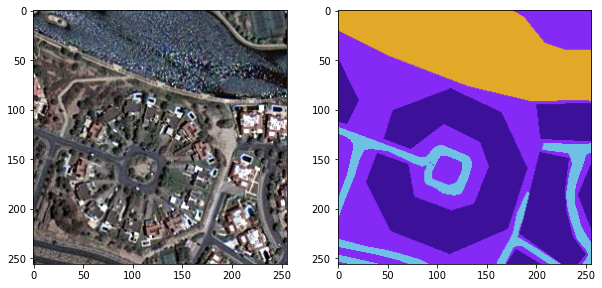

In [30]:
import random
sample = random.randint(0, len(image_data))
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image_data[sample])
plt.subplot(122)
plt.imshow(mask_data[sample])
plt.show()

In [38]:


dict = {"Building" : "#3C1098",
"Land" : "#8429F6",
"Road" : "#6EC1E4",
"Vegetation" : "#FEDD3A",
"Water" : "#E2A929",
"Unlabeled" : "#9B9B9B"}


In [36]:
a = int('3A', 16) # convert HEX into int
a

58

In [ ]:
dict = {"Building" : "#3C1098",
"Land" : "#8429F6",
"Road" : "#6EC1E4",
"Vegetation" : "#FEDD3A",
"Water" : "#E2A929",
"Unlabeled" : "#9B9B9B"}

In [45]:
RGB_label = {}
for key, value in dict.items():
    value = value.lstrip('#')
    RGB = np.array(tuple(int(value[i:i+2], 16) for i in (0, 2, 4)))
    RGB_label[key] = RGB

print(RGB_label)

{'Building': array([ 60,  16, 152]), 'Land': array([132,  41, 246]), 'Road': array([110, 193, 228]), 'Vegetation': array([254, 221,  58]), 'Water': array([226, 169,  41]), 'Unlabeled': array([155, 155, 155])}


In [52]:
def rgb_to_2d_label(label):
    
    label_array = np.zeros(label.shape, dtype=np.int8)

    for i, (key, value) in enumerate(RGB_label.items()):
        label_array[np.all(label == value, axis=-1)] = i

    label_array = label_array[:,:,0]    # take just first channel, no need of all 3 channel
    return label_array

In [53]:
labels = []

for i in range(mask_data.shape[0]):
    label = rgb_to_2d_label(mask_data[i])
    labels.append(label)

labels = np.array(labels)

In [54]:
labels.shape

(1305, 256, 256)

In [55]:
labels = np.expand_dims(labels, axis=3)
labels.shape

(1305, 256, 256, 1)

In [56]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=int8)

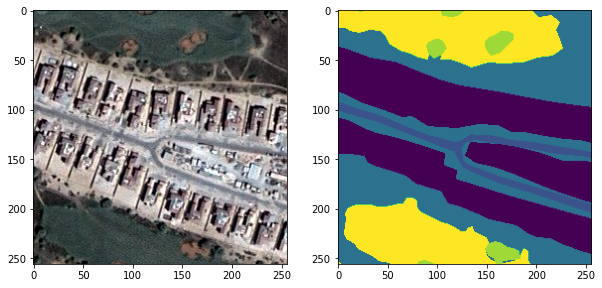

(256, 256, 1)


In [77]:
sample = random.randint(0, len(labels))
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image_data[sample])
plt.subplot(122)
plt.imshow(mask_data[sample][:,:,0])
plt.show()
print(labels[sample].shape)

In [78]:
from keras.utils import to_categorical

num_classes = len(np.unique(labels))
labels_cat = to_categorical(labels, num_classes=num_classes)

In [79]:
labels_cat.shape

(1305, 256, 256, 6)

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels_cat, test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1044, 256, 256, 3),
 (261, 256, 256, 3),
 (1044, 256, 256, 6),
 (261, 256, 256, 6))